In [1]:
from pdrtpy.measurement import Measurement
from pdrtpy.tool.h2excitation import H2ExcitationFit, FitMap
from pdrtpy.plot.excitationplot import ExcitationPlot
import pdrtpy.pdrutils as utils
from pdrtpy.modelset import ModelSet
from pdrtpy.plot.modelplot import ModelPlot
from astropy.nddata import StdDevUncertainty, CCDData, NDData,NDDataArray,NDDataBase
import astropy.units as u
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from lmfit import Parameters, fit_report
from lmfit.model import Model, ModelResult
%matplotlib ipympl

In [2]:
intensity = dict()
intensity['H200S0'] = 3.00e-05
intensity['H200S1'] = 5e-04
intensity['H200S2'] = 4e-04
intensity['H200S3'] = 2e-03
intensity['H200S4'] = 5e-04
intensity['H200S5'] = 10e-04

a = []
for i in intensity:
    # For this example, set a largish uncertainty on the intensity.
    m = Measurement(data=intensity[i],uncertainty=StdDevUncertainty(intensity[i]),
                    identifier=i,unit="erg cm-2 s-1 sr-1")
    print(m)
    a.append(m)

h = H2ExcitationFit(a)
h.column_densities(line=False, norm=False)

3e-05 +/- 3e-05 erg / (s sr cm2)
0.0005 +/- 0.0005 erg / (s sr cm2)
0.0004 +/- 0.0004 erg / (s sr cm2)
0.002 +/- 0.002 erg / (s sr cm2)
0.0005 +/- 0.0005 erg / (s sr cm2)
0.001 +/- 0.001 erg / (s sr cm2)
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]


{2: 1.8197148523853142e+20 +/- 1.8197148523853142e+20 1 / cm2,
 3: 1.1317308644578627e+20 +/- 1.1317308644578627e+20 1 / cm2,
 4: 1.1277706695238658e+19 +/- 1.1277706695238656e+19 1 / cm2,
 5: 1.243204183000424e+19 +/- 1.2432041830004238e+19 1 / cm2,
 6: 9.604023957094949e+17 +/- 9.604023957094949e+17 1 / cm2,
 7: 7.434929075408012e+17 +/- 7.434929075408012e+17 1 / cm2}

INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [ast

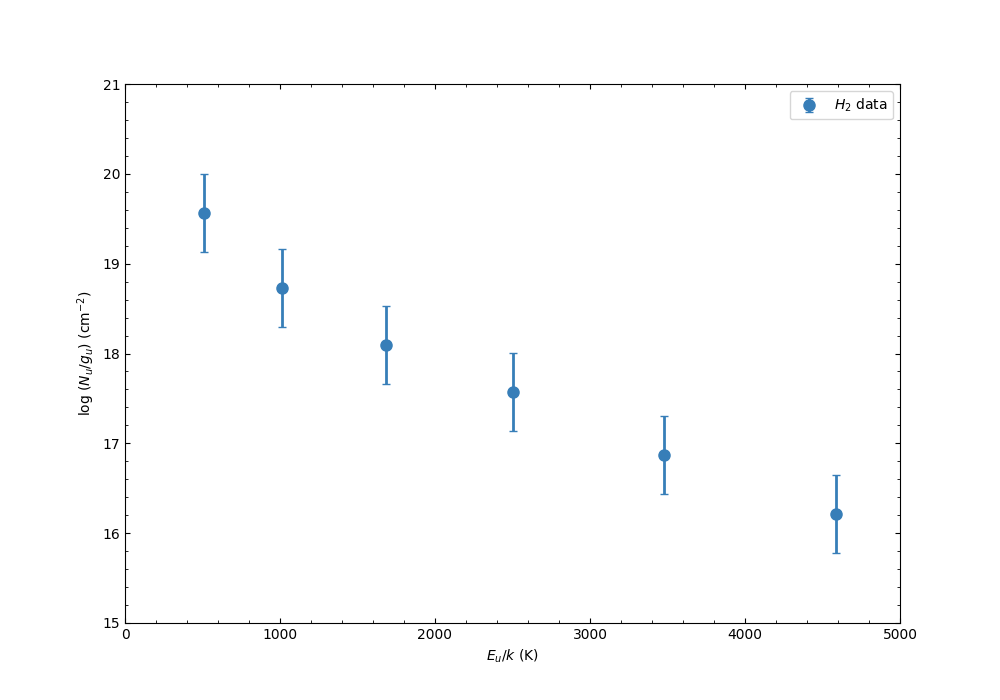

In [3]:
hplot = ExcitationPlot(h,"H_2")
hplot.ex_diagram(ymax=21,xmax=5000)

INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [ast

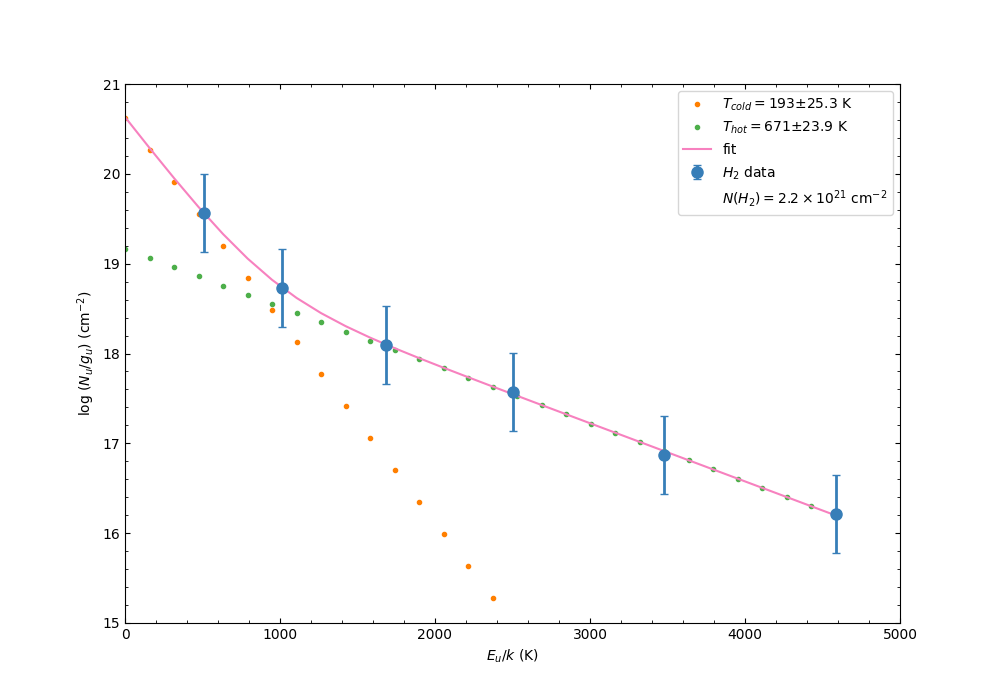

In [4]:
h.run()
hplot.ex_diagram(show_fit=True,ymax=21,xmax=5000)

In [7]:
print(f'T(cold) = {h.tcold}')
print("T(hot) = {:>8.3f}".format(h.thot))
print(f'N(cold) = {h.cold_colden:3.2E}')
print('N(hot) = ',h.hot_colden)
print(f'N(total) = {h.total_colden:+.1e}')
print(f"Ortho-to-para ratio (fixed) = {h.opr:.2f}")

T(cold) = 555.6919254088577 +/- 47.051534306792966 K
T(hot) =  555.692 +/-   47.052 K
N(cold) = 5.94E+20 +/- 2.43E+20 1 / cm2
N(hot) =  5.935770288826235e+20 +/- 2.4347247827063076e+20 1 / cm2
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
N(total) = +1.2e+21 +/- +3.4e+20 1 / cm2
Ortho-to-para ratio (fixed) = 3.00 +/- 0.00 


INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [ast

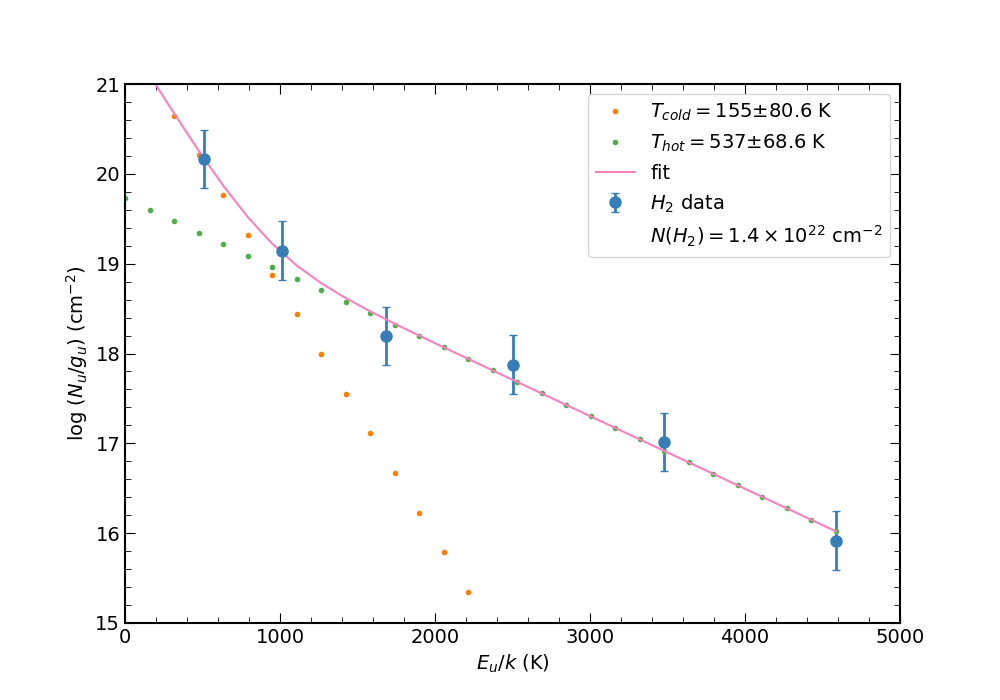

In [6]:
h.run(components=1)
hplot.ex_diagram(show_fit=True,ymax=21,xmax=5000)

INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [astropy.nddata.nddata]
INFO: overwriting NDData's current unit with specified unit. [ast

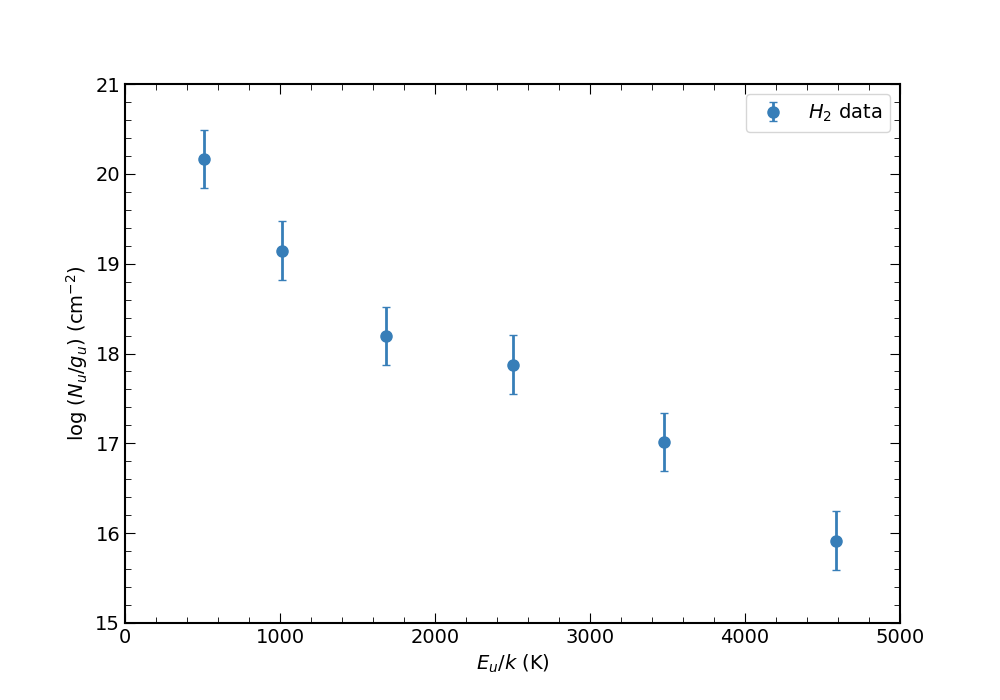

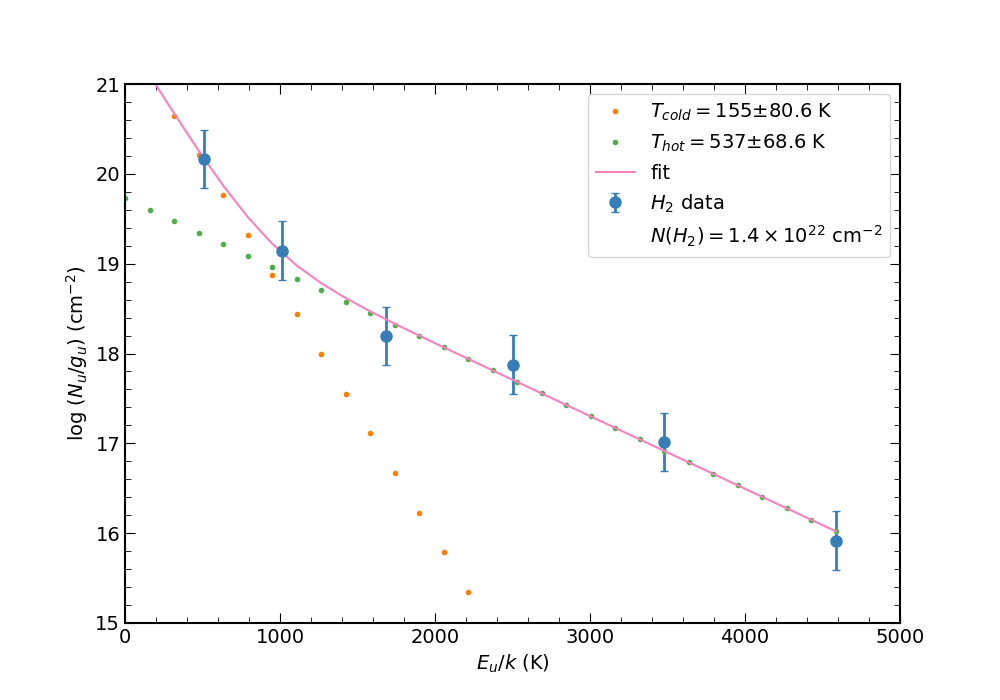

In [5]:
from pdrtpy.measurement import Measurement
from pdrtpy.tool.h2excitation import H2ExcitationFit
from pdrtpy.plot.excitationplot import ExcitationPlot
from astropy.nddata import StdDevUncertainty
intensity = dict()
intensity['H200S0'] = 12e-05
intensity['H200S1'] = 13e-04
intensity['H200S2'] = 5e-04
intensity['H200S3'] = 4e-03
intensity['H200S4'] = 7e-04
intensity['H200S5'] = 5e-04
observations = []
for i in intensity:
    m = Measurement(data=intensity[i],
                    uncertainty=StdDevUncertainty(0.75*intensity[i]),
                    identifier=i,unit="erg cm-2 s-1 sr-1")
    observations.append(m)

# Create the tool to run the fit
hopr = H2ExcitationFit(observations)
# Instantiate the plotter
hplot = ExcitationPlot(hopr,"H_2")

# Set some plot parameters appropriate for manuscript figure; 
# these pass through to matplotlib
hplot._plt.rcParams["xtick.major.size"] = 7
hplot._plt.rcParams["xtick.minor.size"] = 4
hplot._plt.rcParams["ytick.major.size"] = 7
hplot._plt.rcParams["ytick.minor.size"] = 4
hplot._plt.rcParams['font.size'] = 14
hplot._plt.rcParams['axes.linewidth'] =1.5
hplot.ex_diagram(ymax=21)
#hplot.savefig('example9_figure.png',dpi=300)

# Fit a two temperature model allowing OPR to vary
hopr.run()
hplot.ex_diagram(show_fit=True,ymax=21)
#hplot.savefig('example10_figure.png',dpi=300)